# DICOM example

If the dose distribution is generated with a treatment planning system (TPS), export only a dose plane, with a reference point (usually the isocenter on the center of the dose plane image).

In this guide we are going to use the file *'RD_20x20cm2_256x256pix.dcm'*. It is inside the folder */Dosepy/docs/Jupyter*. The DICOM file was created with Eclipse (version 15.1), exporting a region of interest of 20 cm x 20 cm, centered on the isocenter and with 256 x 256 pixels.

Let's import Dosepy and numpy

In [1]:
from Dosepy.image import load
import numpy as np

To read a DICOM file, we call the *load()* function:

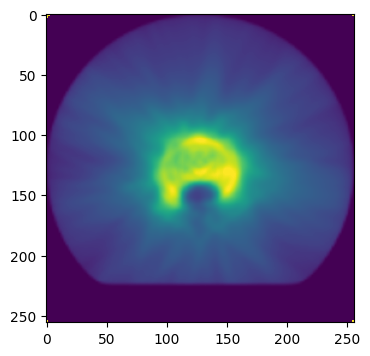

In [2]:
dicom_path = "/home/luis/Documentos/RD_20x20cm2_256x256pix.dcm"

D_tps = load(dicom_path)

#---------------------------------------------
#   Code to plot the dose distribution
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.imshow(D_tps.array, cmap='viridis', vmin=0, vmax = 1.15 * np.percentile(D_tps.array, 98))
plt.show()
#---------------------------------------------

Open the film dose distribution

In [3]:
film_array = np.genfromtxt('/home/luis/Documentos/RD_20x20_300dpi.csv', delimiter=",", comments="#")
D_film = load(film_array, dpi=300)

print(f"D_tps shape: {D_tps.shape}")
print(f"D_film shape: {D_film.shape}")

D_tps shape: (256, 256)
D_film shape: (2362, 2362)


D_tps and D_film have different spatial resolution (dpi). In order to compute gamma, we need to equate the images.

In [4]:
from Dosepy.image import equate_images

D_tps, D_film = equate_images(D_tps, D_film)

print(f"D_tps shape: {D_tps.shape}")
print(f"D_film shape: {D_film.shape}")

D_tps shape: (256, 256)


D_film shape: (256, 256)


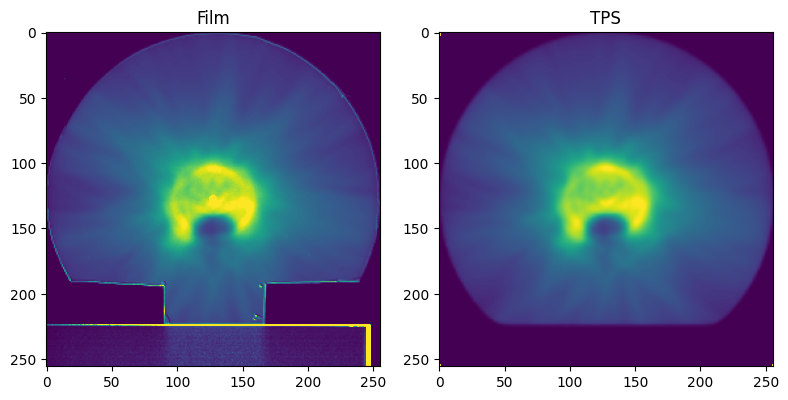

In [5]:
#---------------------------------------------
#   Plot

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(D_film.array, cmap='viridis', vmin=0, vmax = 1.15 * np.percentile(D_tps.array, 98))
ax[0].set_title('Film')
ax[1].imshow(D_tps.array, cmap='viridis', vmin=0, vmax = 1.15 * np.percentile(D_tps.array, 98))
ax[1].set_title('TPS')
fig.tight_layout()
plt.show()
#---------------------------------------------

Make a ROI selection

In [6]:
D_tps = load(D_tps.array[90:165, 75:175], dpi=D_tps.dpi)
D_film = load(D_film.array[90:165, 75:175], dpi=D_film.dpi)

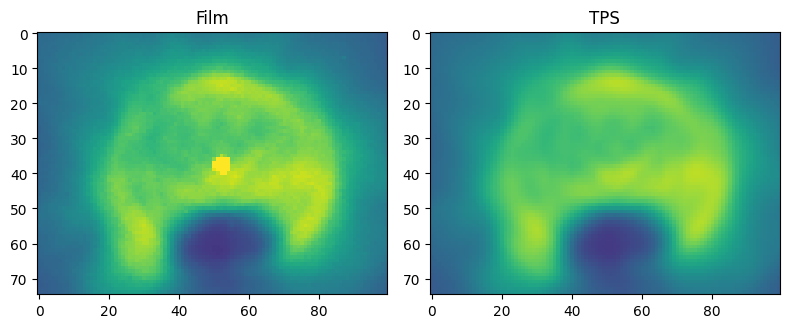

In [7]:
#---------------------------------------------
#   Plot

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(D_film.array, cmap='viridis', vmin=0, vmax = 1.15 * np.percentile(D_tps.array, 98))
ax[0].set_title('Film')
ax[1].imshow(D_tps.array, cmap='viridis', vmin=0, vmax = 1.15 * np.percentile(D_tps.array, 98))
ax[1].set_title('TPS')
fig.tight_layout()
plt.show()
#---------------------------------------------

Compute gamma

In [8]:
g, pass_rate = D_tps.gamma2D(D_film, 3, 2, dose_threshold = 10, mask_radius = 10)

print(f'Pass rate: {pass_rate:.1f} %')

Pass rate: 98.4 %


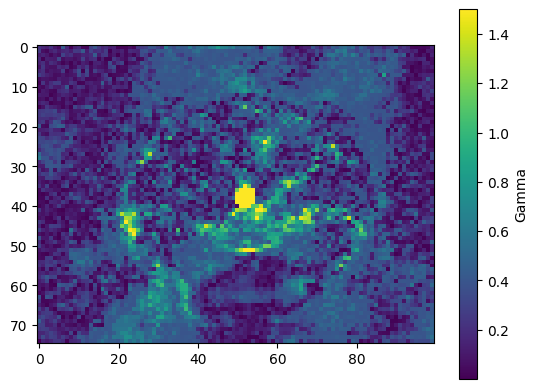

In [9]:
fig, axe = plt.subplots()
g_im = axe.imshow(g, vmax=1.5)
fig.colorbar(g_im, ax=axe, label='Gamma')